## Домашняя работа по базовой математической статистике для Data scientist

Задания со зведочкой не обязательны для зачета.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats


df = pd.read_csv("bikeshare.csv")
del df['datetime']

### 1.
Постройте гистограмму распределения каждой из метрик в датасете при помощи метода датафрейма `hist()`. При необходимости добавьте логарифмированную ось (параметр log).

In [2]:
### YOUR CODE HERE ###
df.head(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


<AxesSubplot:>

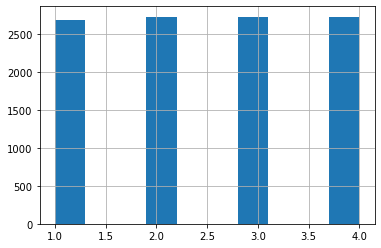

In [7]:
df.season.hist(bins=10)

<AxesSubplot:>

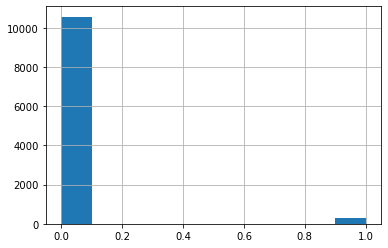

In [8]:
df.holiday.hist()

<AxesSubplot:>

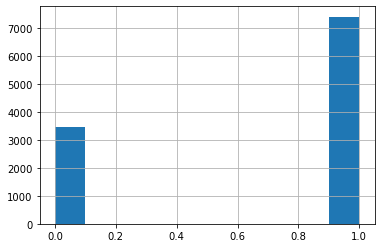

In [9]:
df.workingday.hist()


(array([  69.,  648., 1440., 1891., 1587., 1753., 1901., 1194.,  355.,
          48.]),
 array([ 0.82 ,  4.838,  8.856, 12.874, 16.892, 20.91 , 24.928, 28.946,
        32.964, 36.982, 41.   ]),
 <BarContainer object of 10 artists>)

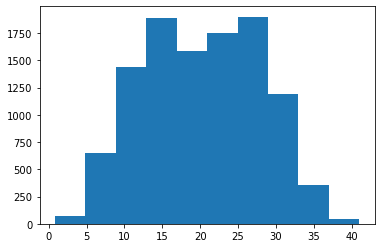

In [13]:
plt.hist(df['temp'], log=False)


### 2.
Для каждой метрики найдите среднее, дисперсию, 50, 75 и 99 перцентили, моду. Какие выводы о наличии аномалий мы можем сделать?

In [14]:
### YOUR CODE HERE ###
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [30]:
 print("Дисперсия:")
print(df.var())

Дисперсия:
season            1.245845
holiday           0.027755
workingday        0.217304
weather           0.401751
temp             60.708872
atemp            71.818856
humidity        370.371306
windspeed        66.659670
casual         2496.049219
registered    22812.789514
count         32813.313153
dtype: float64


In [127]:
#from scipy.stats import skew, mode
get_mode = lambda x: x.value_counts(dropna=False).index[0]
get_mode.__name__ = "most frequent"
get_55 = lambda x: x.quantile(0.55)
get_55.__name__ = "q55"
get_75 = lambda x: x.quantile(0.75)
get_75.__name__ = "q75"
get_99 = lambda x: x.quantile(0.99)
get_99.__name__ = "q99"
print(type(df["temp"]))
from statistics import mean, median

#print(get_max)
#df.columns
#research_list=df.columns
#print(research_list)
df[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count']].agg([sum, 'mean', median, get_mode, 'var',get_55, get_75, get_99])
#df[columns].agg(['sum', 'mean','median'])

<class 'pandas.core.series.Series'>


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
sum,27287.000000,311.000000,7412.000000,15441.000000,220233.140000,257509.245000,673696.000000,139334.218400,392135.000000,1.693341e+06,2.085476e+06
mean,2.506614,0.028569,0.680875,1.418427,20.230860,23.655084,61.886460,12.799395,36.021955,1.555522e+02,1.915741e+02
median,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,62.000000,12.998000,17.000000,1.180000e+02,1.450000e+02
most frequent,4.000000,0.000000,1.000000,1.000000,14.760000,31.060000,88.000000,0.000000,0.000000,3.000000e+00,5.000000e+00
var,1.245845,0.027755,0.217304,0.401751,60.708872,71.818856,370.371306,66.659670,2496.049219,2.281279e+04,3.281331e+04
q55,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,12.998000,21.000000,1.360000e+02,1.680000e+02
q75,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,77.000000,16.997900,49.000000,2.220000e+02,2.840000e+02
q99,4.000000,1.000000,1.000000,3.000000,36.080000,40.150000,100.000000,35.000800,240.150000,6.970000e+02,7.741500e+02


### 3. (*) 
 Для каждой метрики проанализируйте ассиметрию и смещенность распределения – для этого посчитайте для каждой метрики коэффициент ассиметрии и эксцесса.

In [131]:
### YOUR CODE HERE ###
research_list=df.columns
for i in research_list:
    print(i)
    print("Эксцесс ", kurtosis(df[i])) #выше или ниже норм распределения. Эксцесс у норм распределения равен 0
    print("Ассиметрия ", skew(df[i])) #левее или правее, чем у норм распределения. Ассиметрия у норм распределения равен 0



season
Эксцесс  -1.3555899543299803
Ассиметрия  -0.007074695296526289
holiday
Эксцесс  30.032624417535125
Ассиметрия  5.6597371332540805
workingday
Эксцесс  -1.3977369782030475
Ассиметрия  -0.7760560687198784
weather
Эксцесс  0.39480007841067577
Ассиметрия  1.2433126730817885
temp
Эксцесс  -0.9146613849825282
Ассиметрия  0.0036903358354289715
atemp
Эксцесс  -0.8502363689497141
Ассиметрия  -0.10254538108264065
humidity
Эксцесс  -0.760019710012902
Ассиметрия  -0.0863232869219358
windspeed
Эксцесс  0.629292367034056
Ассиметрия  0.5886853963635482
casual
Эксцесс  7.547610130561701
Ассиметрия  2.495404491505502
registered
Эксцесс  2.6243238654959855
Ассиметрия  1.5245944734221468
count
Эксцесс  1.2989447727380323
Ассиметрия  1.241895058803035


### 4.

Постройте симметричный доверительный интервал для метрики с самой большой дисперсией при доверительной вероятности 0.95. 

Text(0.5, 1.0, 'Count')

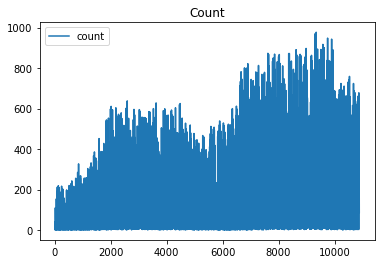

In [135]:
### YOUR CODE HERE ###
df[['count']].plot()
plt.title("Count")


(array([4284., 2337., 1686., 1067.,  633.,  426.,  233.,  116.,   85.,
          19.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <BarContainer object of 10 artists>)

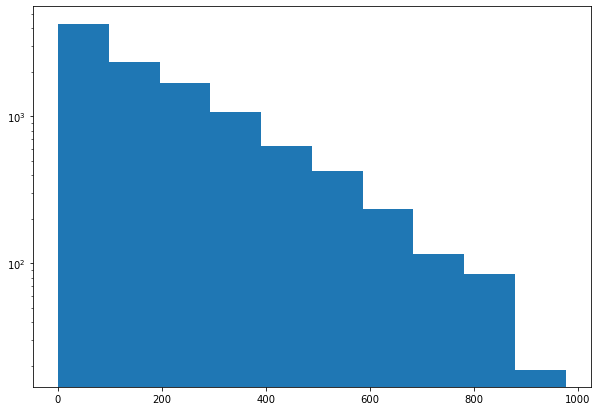

In [14]:
plt.hist(df['count'], log=True)

In [137]:
def my_basic_research(df=df, column = "count"):
    print("Базовые метрики")
    print(df[column].describe())
    print("------------------------------------")
    
    print("Самые популярные значения метрики, топ 5")
    print(df[column].value_counts().nlargest(5))
    print("------------------------------------")
    
    print("Эксцесс ", kurtosis(df[column]))
    print("Ассиметрия ", skew(df[column]))
    
    sns.distplot(df[column])
    plt.title("Распределение метрики")

Базовые метрики
count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64
------------------------------------
Самые популярные значения метрики, топ 5
5    169
4    149
3    144
6    135
2    132
Name: count, dtype: int64
------------------------------------
Эксцесс  1.2989447727380323
Ассиметрия  1.241895058803035


C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


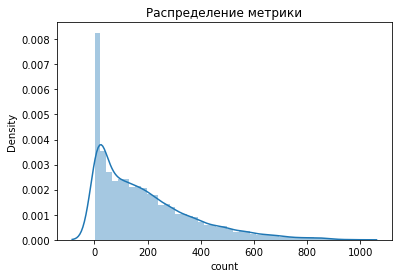

In [138]:
my_basic_research(column = "count")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.special as sps
from scipy import *
import warnings
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats
import statsmodels.api as sm

%matplotlib inline
plt.rcParams["figure.figsize"] = (10.0, 7.0)
warnings.filterwarnings("ignore")

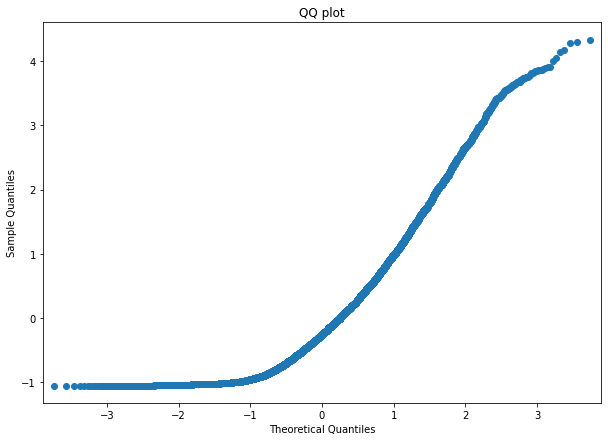

In [6]:
sm.qqplot(df['count'], fit = True)
plt.title("QQ plot")
plt.show()

In [7]:
def my_norm_confidence(df=df, column = "count", alpha = 0.95):
    interval = stats.norm.interval(alpha, loc=df[column].mean(), scale=df[column].std())
    return interval

In [8]:
confidence = my_norm_confidence()
print(confidence)

(-163.46247359398893, 546.6107374190854)


Text(0.5, 1.0, 'Доверительный интервал')

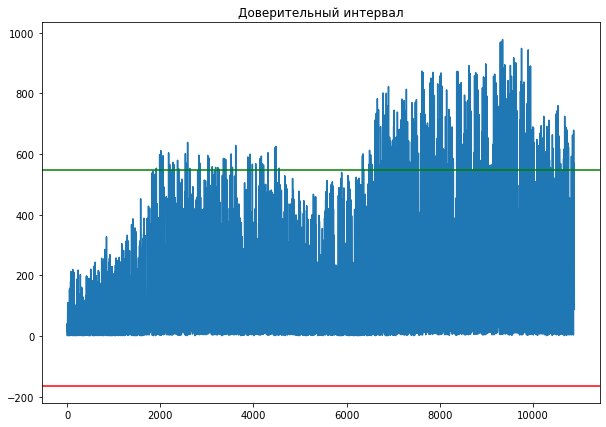

In [11]:
df['count'].plot()
plt.axhline(y=confidence[1], color="g", linestyle="-")
plt.axhline(y=confidence[0], color="r", linestyle="-")
plt.title("Доверительный интервал")

### 5. (*)

Найдите количество значений, выходящих за три сигмы для каждой из метрик. Где получилось больше всего аномалий?

In [15]:
### YOUR CODE HERE ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.special as sps
import warnings
from scipy.stats import kurtosis
from scipy.stats import skew
from sklearn.datasets import load_diabetes

%matplotlib inline
plt.rcParams["figure.figsize"] = (10.0, 7.0)
warnings.filterwarnings("ignore")



In [19]:
upper_level = df['count'].mean() + 3*df['count'].std()
lower_level = df['count'].mean() - 3*df['count'].std()
print(lower_level,upper_level)

-351.8592295783066 735.007493403403


Text(0.5, 1.0, '3 sigma')

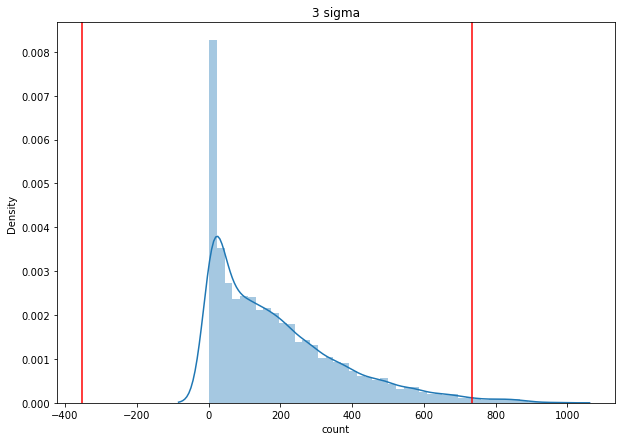

In [21]:
sns.distplot(df['count'])
plt.axvline(x=lower_level, color="r", linestyle="-")
plt.axvline(x=upper_level, color="r", linestyle="-")
plt.title("3 sigma")

In [29]:
df[df['count']>= upper_level].describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,147.000000,147.0,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,2.918367,0.0,0.979592,1.251701,27.562041,31.416259,49.965986,13.653324,94.605442,723.068027,817.673469
std,0.780851,0.0,0.141875,0.521372,4.724647,5.006018,15.435866,7.649694,45.135649,65.703950,54.235428
min,1.000000,0.0,0.000000,1.000000,15.580000,12.120000,17.000000,0.000000,21.000000,381.000000,737.000000
25%,2.000000,0.0,1.000000,1.000000,24.600000,27.652500,38.000000,8.998100,76.500000,686.000000,773.000000
50%,3.000000,0.0,1.000000,1.000000,28.700000,31.820000,49.000000,12.998000,95.000000,733.000000,813.000000
75%,3.000000,0.0,1.000000,1.000000,31.160000,35.605000,62.000000,16.997900,109.500000,762.500000,853.000000
max,4.000000,0.0,1.000000,3.000000,37.720000,40.910000,89.000000,39.000700,362.000000,886.000000,977.000000


In [30]:
def find_anomaly(df, column):
    upper_level = df[column].mean() + 3*df[column].std()
    level_99 = np.percentile(df[column], 99)
    anomaly = df[(df[column] >= upper_level)^(df[column] >= level_99)]
    return anomaly,upper_level,level_99

In [32]:
anomaly = find_anomaly(df=df, column = "count")
len(anomaly[0])/len(df)

0.0034907220282932206

### 6.

Постройте корреляционную матрицу и heatmap по метрикам. Какие выводы о наличии связей можно сделать?

In [34]:
### YOUR CODE HERE ###
research_list=df.columns
corr_m = df[research_list].corr()
corr_m


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


<AxesSubplot:>

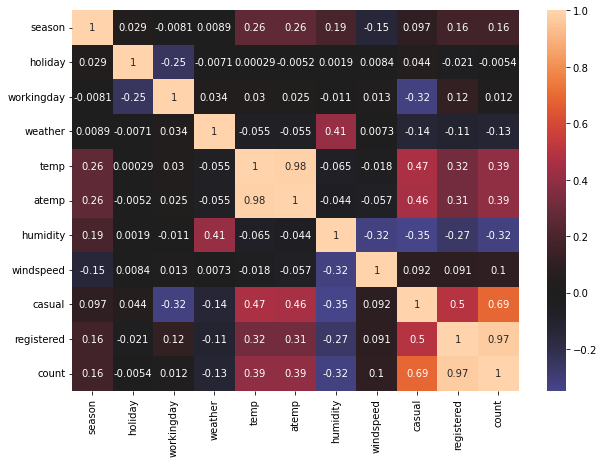

In [37]:
plt.figure(figsize=(10,7))
sns.heatmap(corr_m, center=0, annot=True)

<AxesSubplot:>

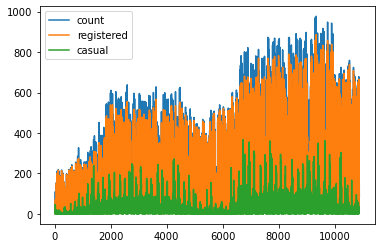

In [88]:
df[['count','registered','casual']].plot()

<AxesSubplot:>

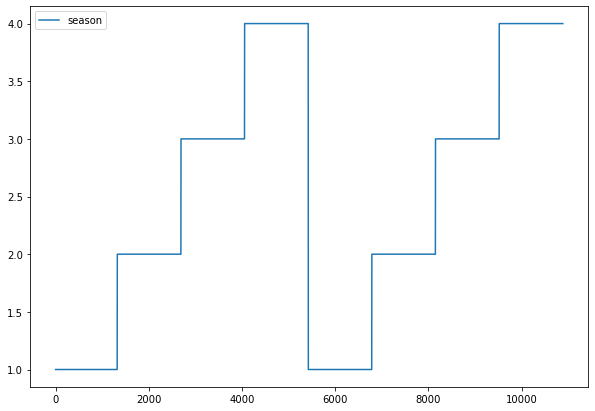

In [13]:
df[['season']].plot()